## Spark OCR image processing example using ImageTransformer

## Install spark-ocr python packge
Need specify path to `spark-ocr-assembly-[version].jar` or `secret`

In [1]:
secret = ""
license = ""
version = secret.split("-")[0]
spark_ocr_jar_path = "../../target/scala-2.11/"

In [2]:
# install from PYPI using secret
%pip install spark-ocr==$version+spark32 --extra-index-url=https://pypi.johnsnowlabs.com/$secret --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.johnsnowlabs.com/4.0.0-49cdb09f66ca01a93f959366f0e4a84d1a09b2df


In [3]:
# or install from local path
#%pip install --upgrade ../../python/dist/spark-ocr-3.12.1rc1+spark30.tar.gz

## Initialization of spark session

In [4]:
from pyspark.sql import SparkSession
from sparkocr import start
import sys
import os

if license:
    os.environ['JSL_OCR_LICENSE'] = license

spark = start(secret=secret, jar_path=spark_ocr_jar_path)
spark

Spark version: 3.2.1
Spark NLP version: 4.0.0
Spark OCR version: 4.0.0



## Imports

In [5]:
from pyspark.ml import PipelineModel
from pyspark.sql import functions as F

from sparkocr.transformers import *
from sparkocr.enums import *
from sparkocr.utils import display_images

## Read image

In [6]:
import pkg_resources
imagePath = pkg_resources.resource_filename('sparkocr', 'resources/ocr/images/check.jpg')
image_raw = spark.read.format("binaryFile").load(imagePath)
image_df = BinaryToImage().transform(image_raw)


    Image #0:
    Origin: file:/usr/local/lib/python3.7/dist-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 582 px
    Height: 744 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


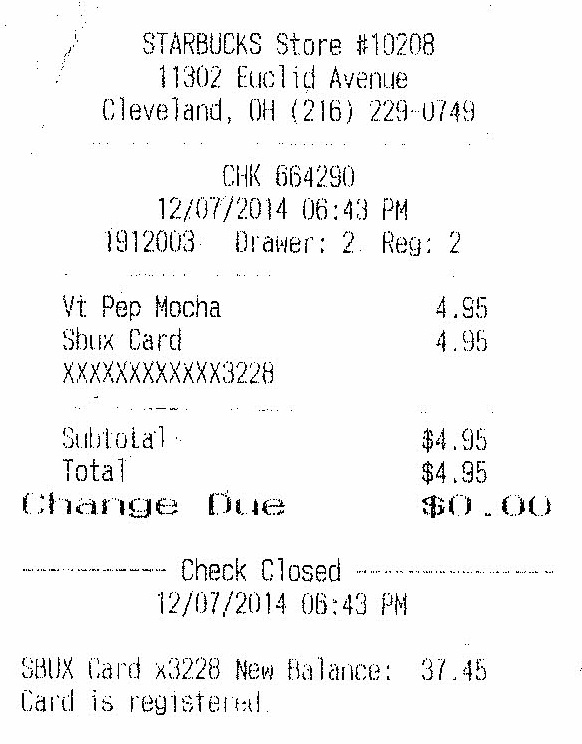

In [7]:
display_images(image_df)

## Scaling


    Image #0:
    Origin: file:/usr/local/lib/python3.7/dist-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 1164 px
    Height: 1488 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


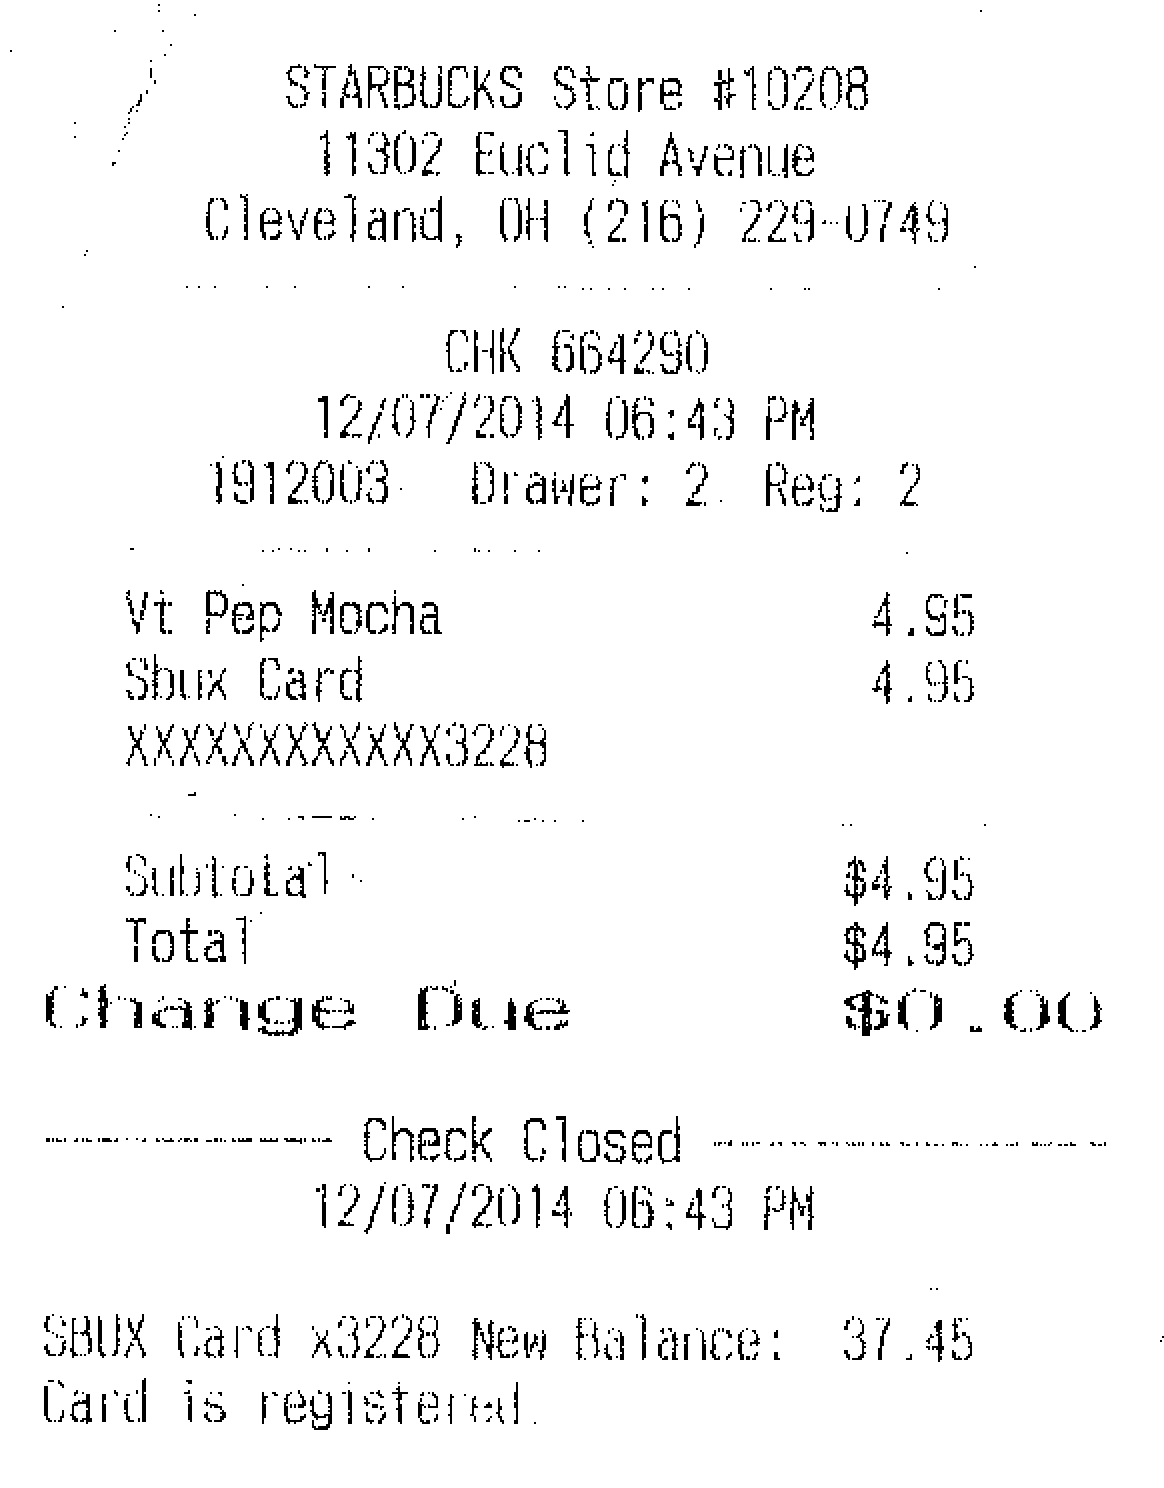

In [8]:
scaled_image_df = ImageTransformer() \
.addErodeTransform(1,1)\
.addScalingTransform(2) \
.setInputCol("image") \
.setOutputCol("scaled_image") \
.transform(image_df)

display_images(scaled_image_df, "scaled_image")

## Image Adaptive Thresholding


    Image #0:
    Origin: file:/usr/local/lib/python3.7/dist-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 582 px
    Height: 744 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


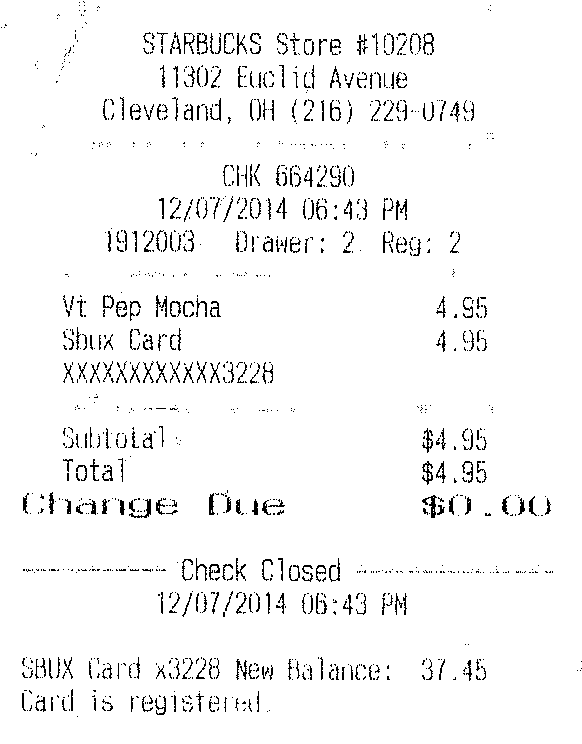

In [9]:
thresholded_image = ImageTransformer() \
.addAdaptiveThreshold(61, 10)\
.setInputCol("image") \
.setOutputCol("thresholded_image") \
.transform(image_df)

display_images(thresholded_image, "thresholded_image")

## Erosion


    Image #0:
    Origin: file:/usr/local/lib/python3.7/dist-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 582 px
    Height: 744 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


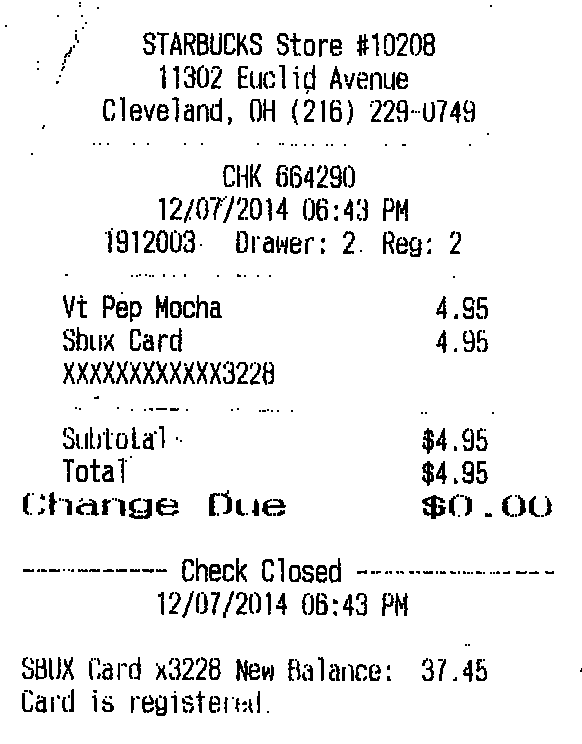

In [10]:
eroded_image = ImageTransformer() \
.addErodeTransform(2,2)\
.setInputCol("image") \
.setOutputCol("eroded_image") \
.transform(image_df)

display_images(eroded_image, "eroded_image")

## Dilation


    Image #0:
    Origin: file:/usr/local/lib/python3.7/dist-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 582 px
    Height: 744 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


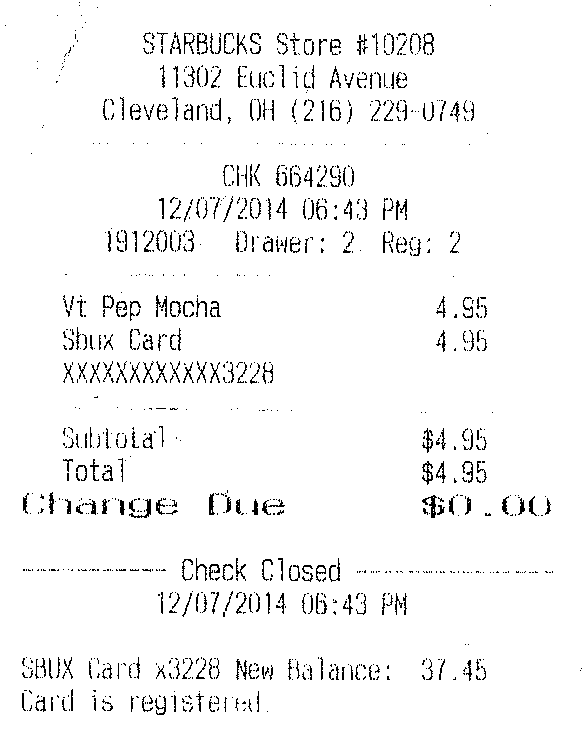

In [11]:
dilated_image = ImageTransformer() \
.addDilateTransform(1, 1)\
.setInputCol("image") \
.setOutputCol("dilated_image") \
.transform(image_df)

display_images(dilated_image, "dilated_image")

## Remove Objects


    Image #0:
    Origin: file:/usr/local/lib/python3.7/dist-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 1164 px
    Height: 1488 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


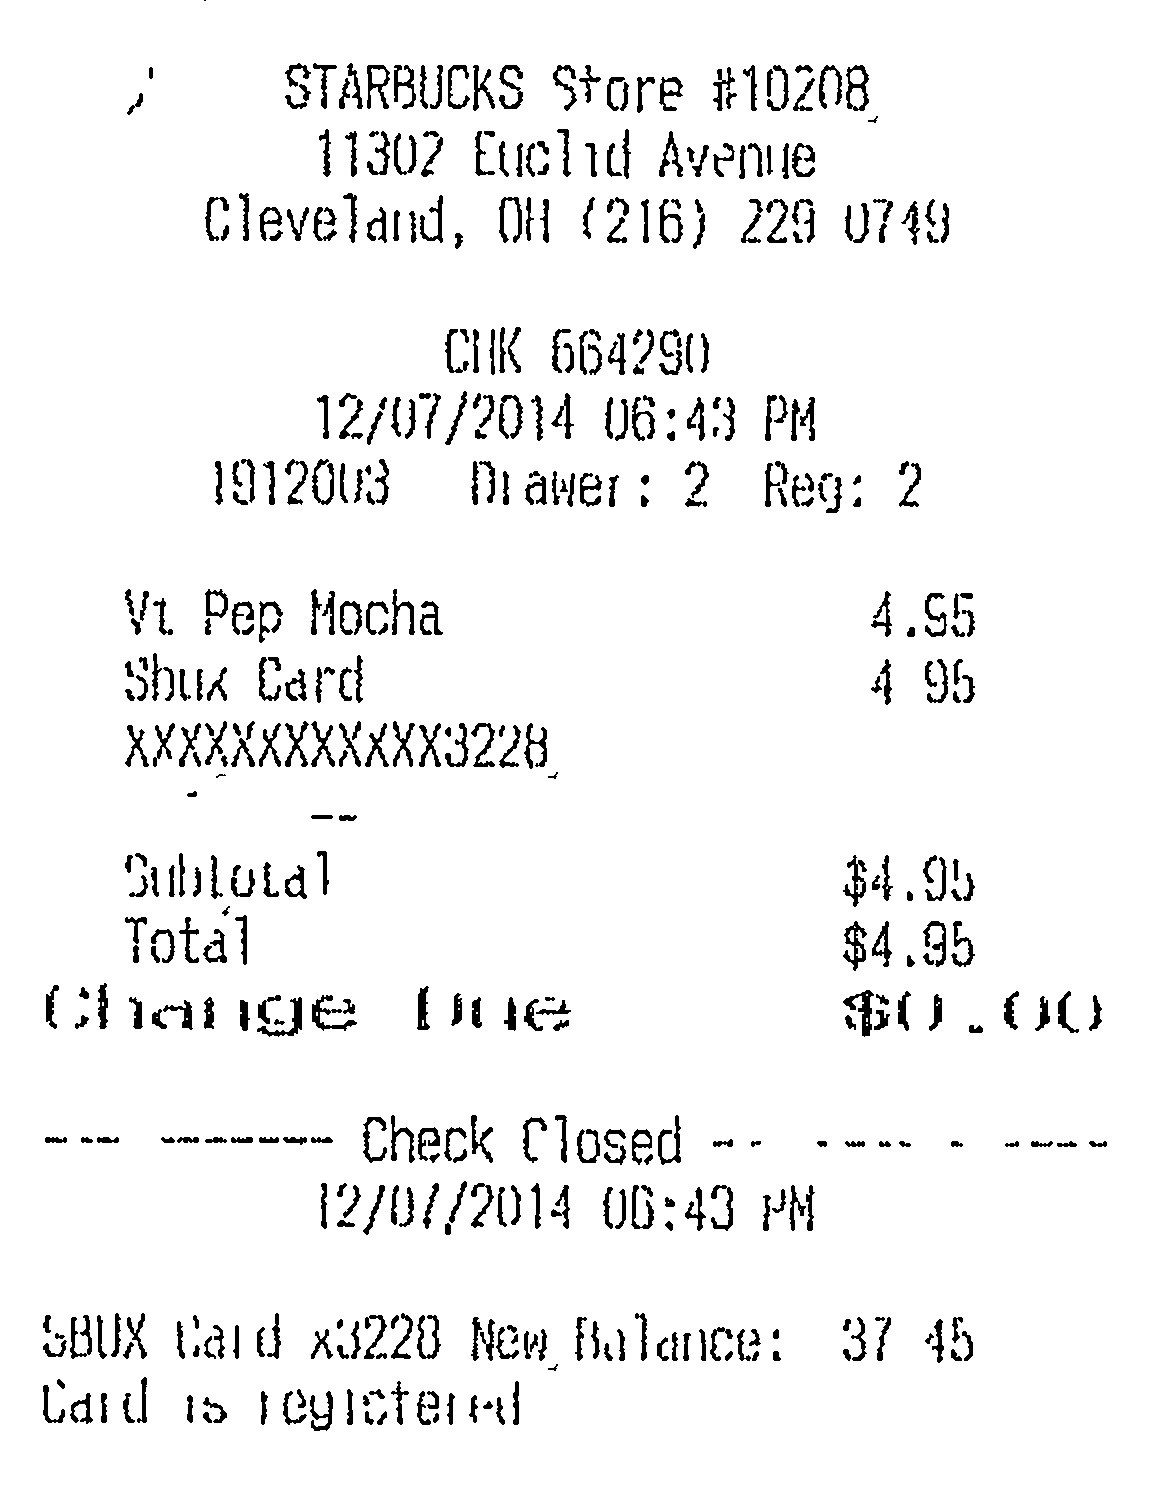

In [12]:
multiple_image = ImageTransformer() \
.addScalingTransform(2) \
.addAdaptiveThreshold(31, 2)\
.addRemoveObjects(10, 500) \
.setInputCol("image") \
.setOutputCol("multiple_image") \
.transform(image_df)

display_images(multiple_image, "multiple_image")

## Median Blur


    Image #0:
    Origin: file:/usr/local/lib/python3.7/dist-packages/sparkocr/resources/ocr/images/check.jpg
    Resolution: 199 dpi
    Width: 1164 px
    Height: 1488 px
    Mode: ImageType.TYPE_BYTE_BINARY
    Number of channels: 3


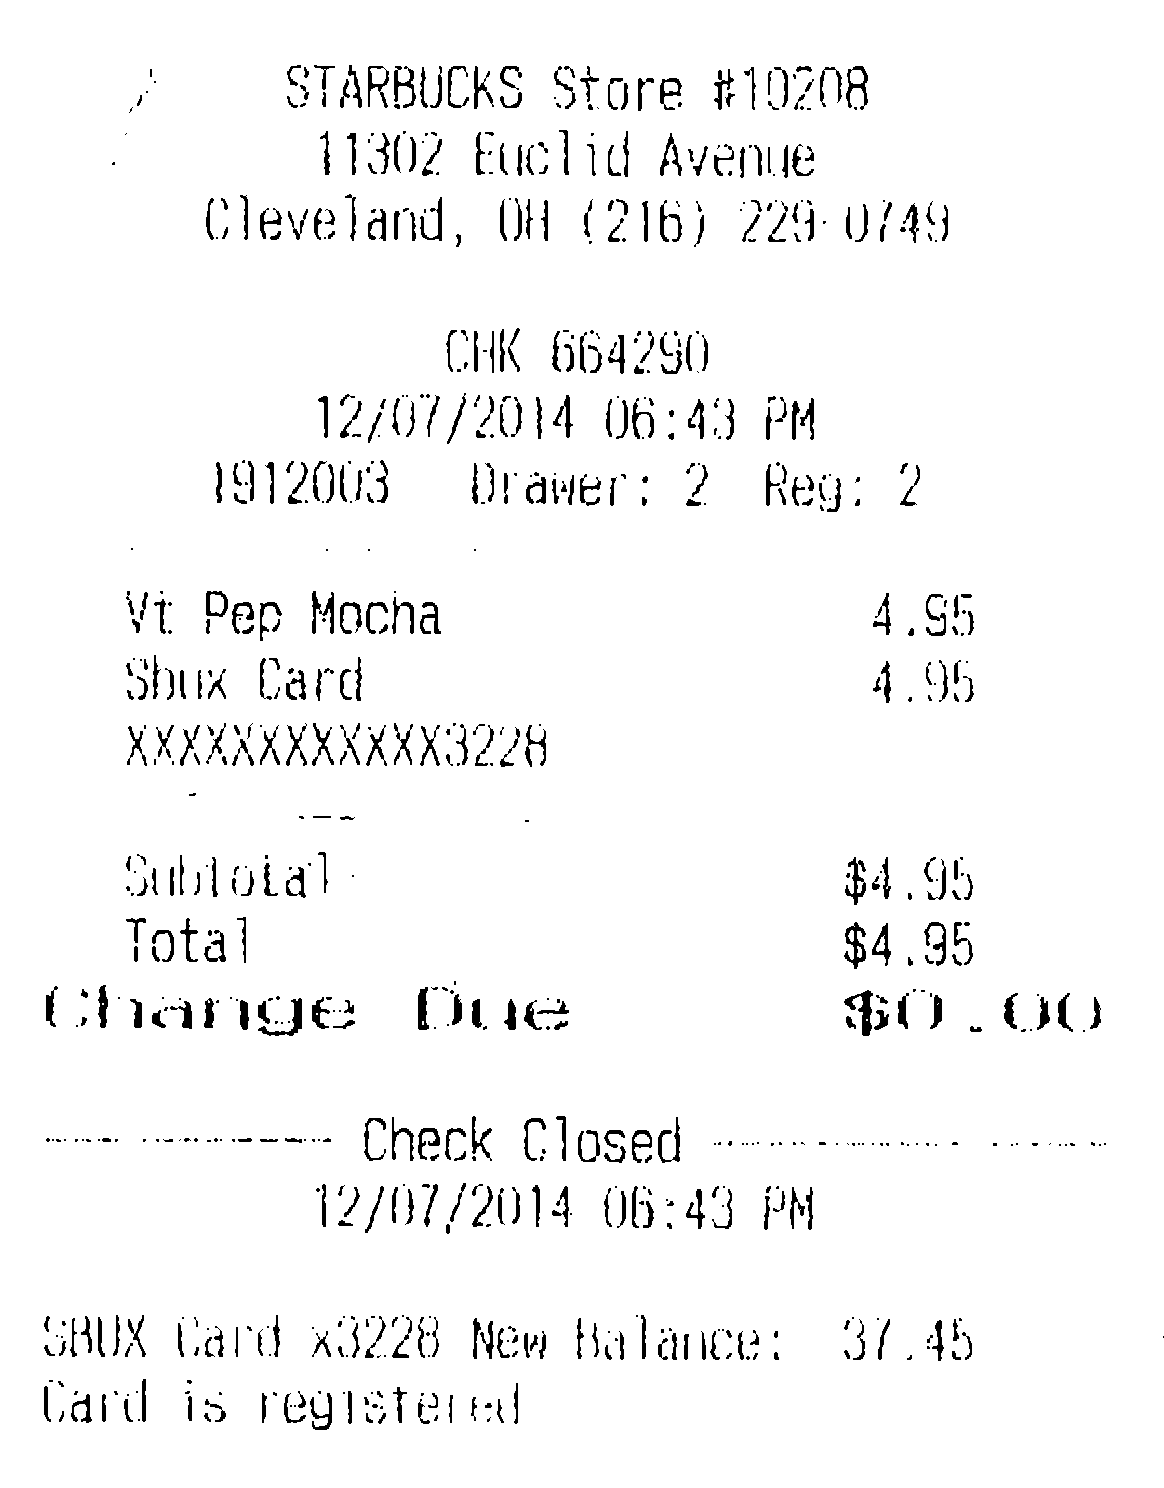

In [13]:
multiple_image = ImageTransformer() \
.addScalingTransform(2) \
.addMedianBlur(3) \
.setInputCol("image") \
.setOutputCol("multiple_image") \
.transform(image_df)

display_images(multiple_image, "multiple_image")